<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# End-of-Day Analysis with Alphalens

Alphalens is an open-source performance analysis library which pairs well with the Pipeline API. In this notebook we will use Alphalens to analyze whether our momentum factor is predictive of forward returns. 

> Using Alphalens makes sense when you believe your end-of-day Pipeline rules have alpha. In contrast, if your Pipeline rules simply perform a basic screen and the alpha is entirely provided by your intraday trading rules, it might make more sense to omit this step. 

Let's re-define our pipeline from the previous notebook:

In [1]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume, Returns

pipeline = Pipeline(
    columns={
        "returns": Returns(window_length=252),
    },
    screen=AverageDollarVolume(window_length=30) > 10e6
)

To see if our momentum factor is predictive of forward returns, we can use the Alphalens `from_pipeline` function. This function executes a pipeline for a specified date range, splits the data into quantiles based on one of the pipeline columns, and provides a tear sheet of forward returns by quantile. For a predictive factor, the higher quantiles should perform better than the lower quantiles.

,min,max,mean,std,count,avg daily count,count %
Factor Quantile,,,,,,,
1,-0.619,0.397,-0.022,0.198,"2,016",4.0,55.4%
2,-0.107,0.963,0.285,0.177,"1,620",3.2,44.6%


,1D
Ann. alpha,0.137
beta,-0.108
Mean Relative Return Top Quantile (bps),1.207
Mean Relative Return Bottom Quantile (bps),-1.099
Mean Spread (bps),2.306


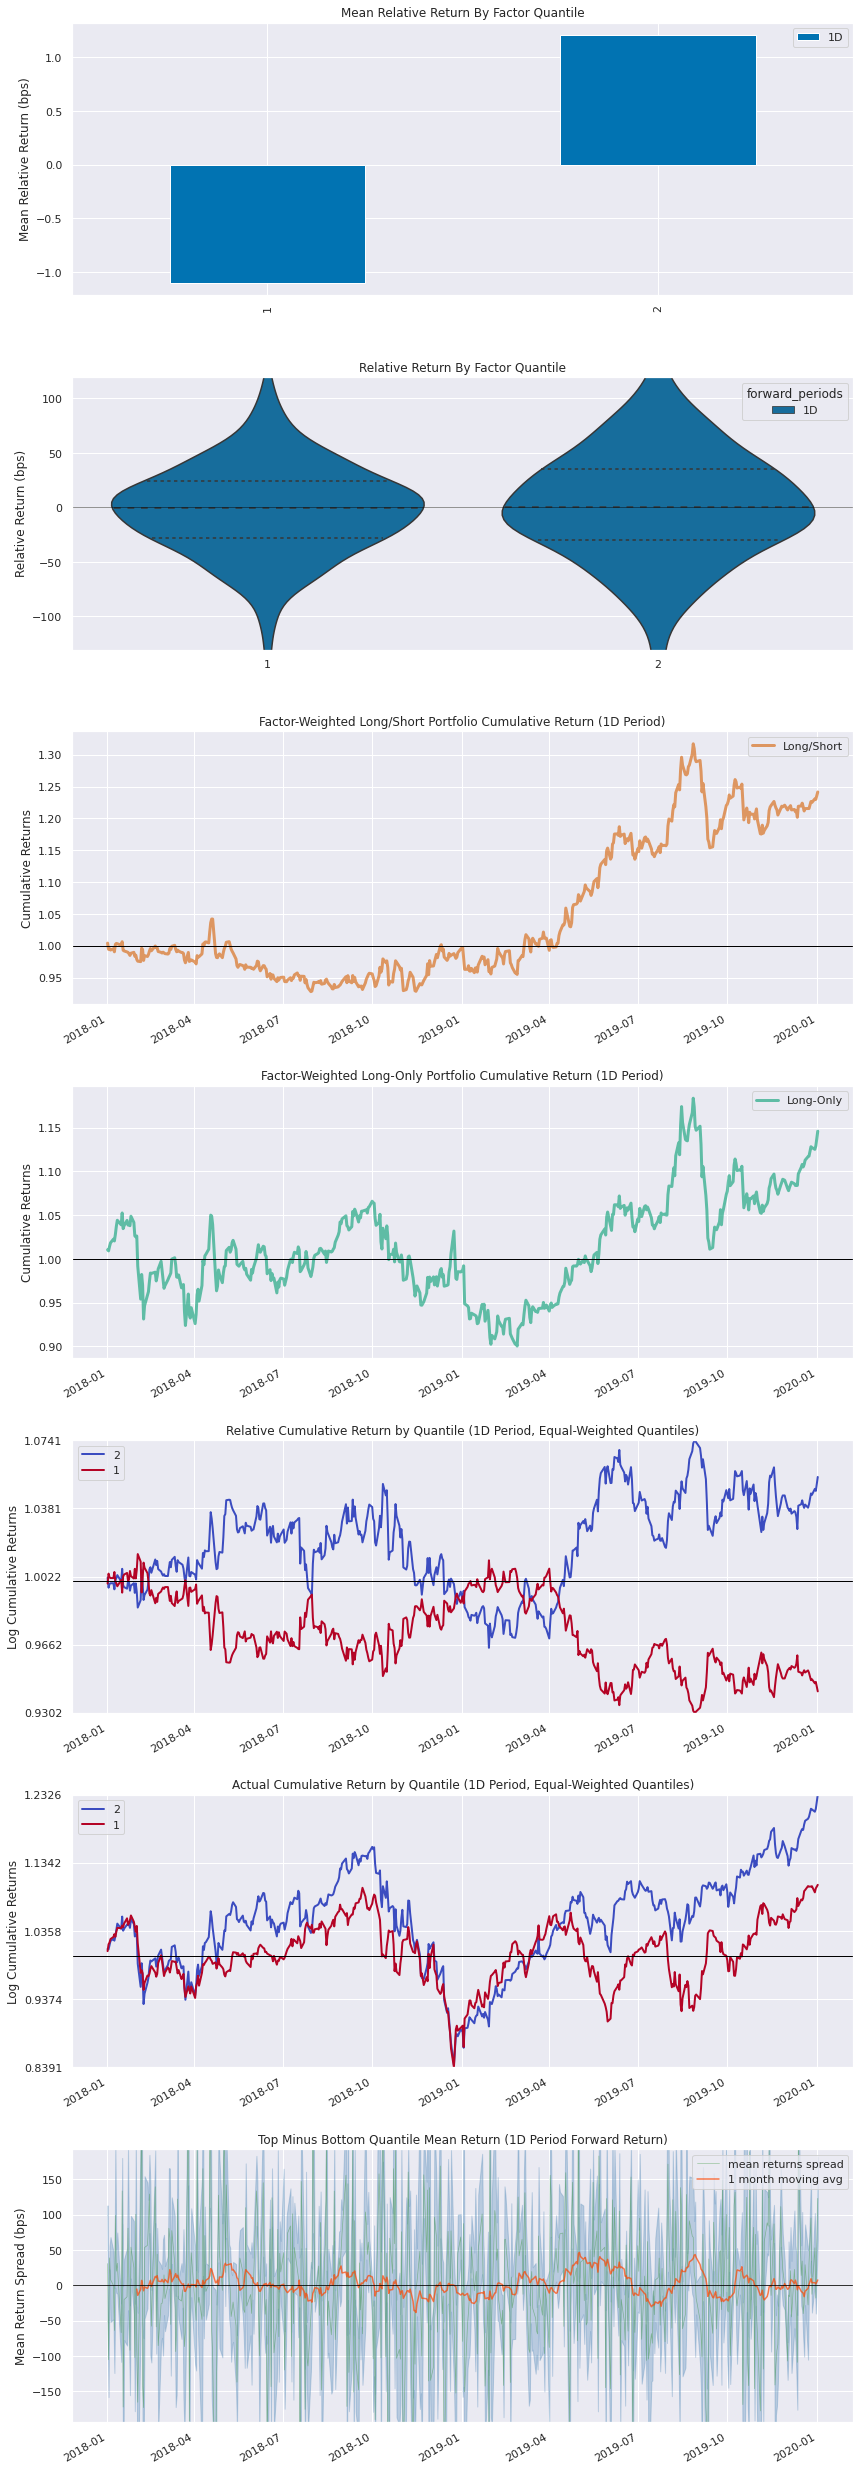

,1D
IC Mean,0.036
IC Std.,0.463
Risk-Adjusted IC,0.077
t-stat(IC),1.726
p-value(IC),0.085
IC Skew,-0.016
IC Kurtosis,-0.898


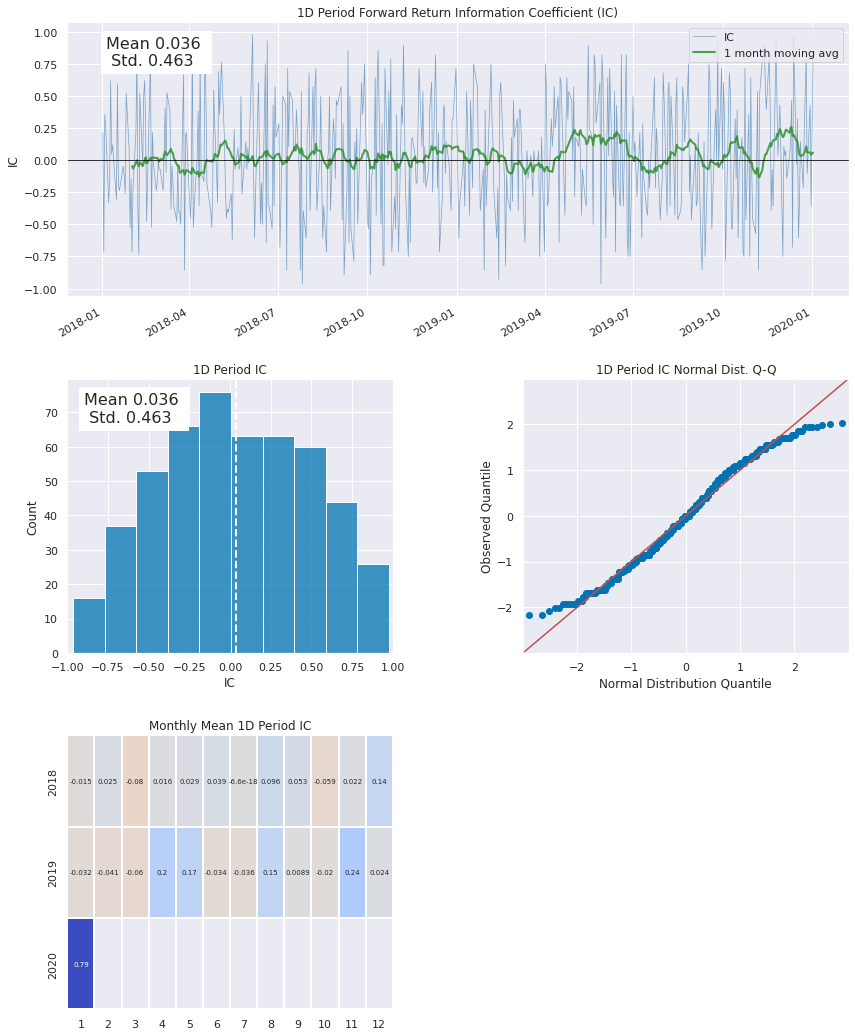

,1D
Quantile 1 Mean Turnover,0.042
Quantile 2 Mean Turnover,0.056


,1D
Mean Factor Rank Autocorrelation,0.979


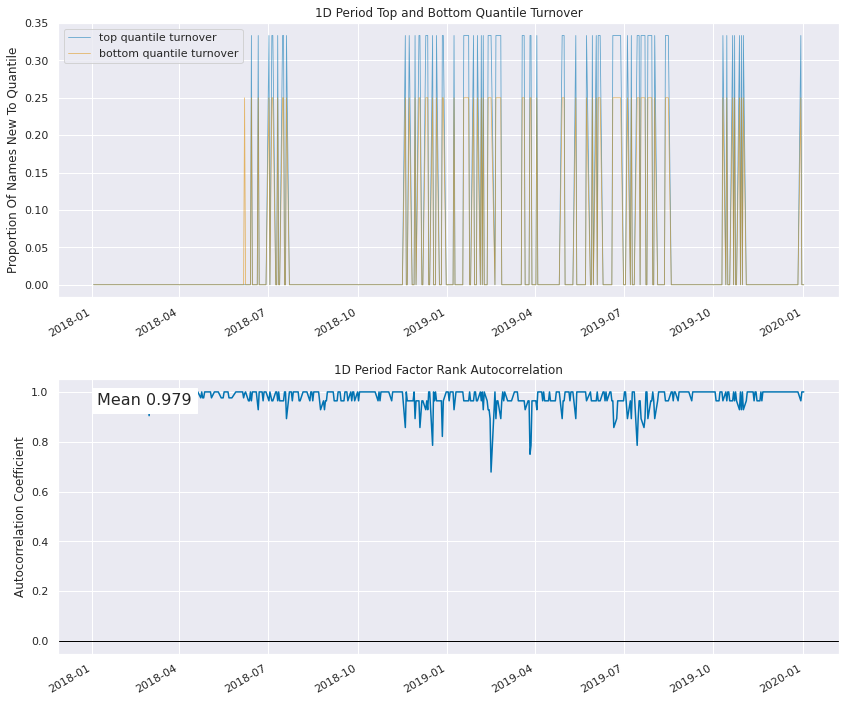

In [2]:
import alphalens as al

al.from_pipeline(
    pipeline, 
    # the `factor` argument tells which Pipeline column to use to form the quantiles
    factor="returns",
    start_date="2018-01-01", 
    end_date="2020-01-01",
    # For a very small sample universe, you might only want 2 quantiles 
    quantiles=2
)

***

## *Next Up*

Part 4: [Intraday Trading Rules](Part4-Intraday-Trading-Rules.ipynb)